In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Dataset/valid',
    labels ='inferred',
    label_mode = "categorical",
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (128,128),
    shuffle  = True,
    seed = None,
    validation_split =None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False

)
class_names = validation_set.class_names
print(class_names)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [11]:
cnn = (tf.keras.models.load_model('trained_plant_disease_model.keras'))

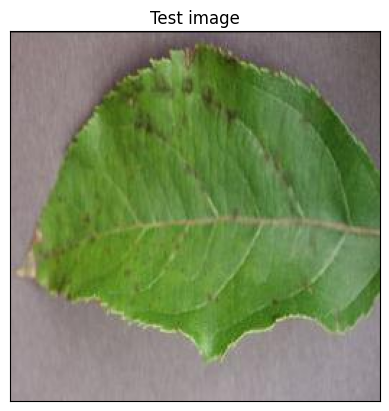

In [12]:
import cv2
image_path = 'Dataset/test/apple_scab.JPG'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test image')
plt.xticks([])
plt.yticks([])
plt.show()


In [13]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [14]:
print(predictions)

[[2.67866882e-03 1.99343602e-04 3.92825576e-03 1.20851178e-06
  8.08064016e-08 1.47887200e-01 6.94201080e-05 3.28391343e-06
  1.03523963e-08 3.57127909e-08 2.59232209e-08 5.84568897e-06
  9.79259518e-09 2.27402779e-06 8.32497358e-01 2.01942079e-04
  1.29194473e-06 2.88971655e-08 8.04946394e-05 5.36625786e-03
  1.23416095e-08 9.37918900e-04 4.07046033e-03 4.13567672e-04
  1.41211804e-05 2.93414159e-05 3.79948091e-07 1.41242654e-05
  1.04678399e-03 4.52456479e-05 4.41401171e-05 1.73148283e-06
  4.16715542e-04 5.31033137e-08 3.73943038e-07 4.07676125e-05
  1.65097038e-08 1.10563769e-06]]


In [15]:
result_index = np.argmax(predictions)
print(predictions)

[[2.67866882e-03 1.99343602e-04 3.92825576e-03 1.20851178e-06
  8.08064016e-08 1.47887200e-01 6.94201080e-05 3.28391343e-06
  1.03523963e-08 3.57127909e-08 2.59232209e-08 5.84568897e-06
  9.79259518e-09 2.27402779e-06 8.32497358e-01 2.01942079e-04
  1.29194473e-06 2.88971655e-08 8.04946394e-05 5.36625786e-03
  1.23416095e-08 9.37918900e-04 4.07046033e-03 4.13567672e-04
  1.41211804e-05 2.93414159e-05 3.79948091e-07 1.41242654e-05
  1.04678399e-03 4.52456479e-05 4.41401171e-05 1.73148283e-06
  4.16715542e-04 5.31033137e-08 3.73943038e-07 4.07676125e-05
  1.65097038e-08 1.10563769e-06]]


Grape___healthy


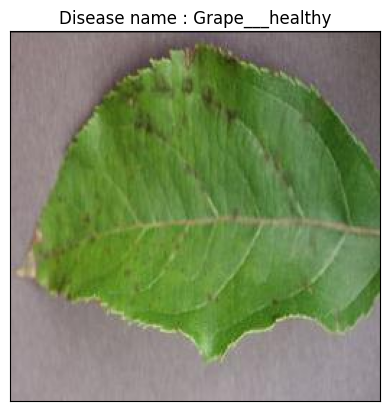

In [16]:
model_prediction = class_names[result_index]
print(model_prediction)
plt.imshow(img)
plt.title(f"Disease name : {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
